In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("dataset_task1.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

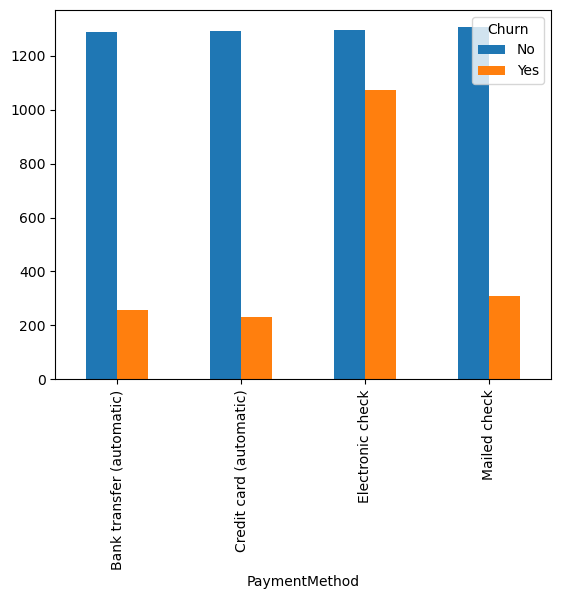

In [5]:
pd.crosstab(df.PaymentMethod, df.Churn).plot(kind="bar")
plt.show()

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [9]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

* we observe that the data is quite imbalanced

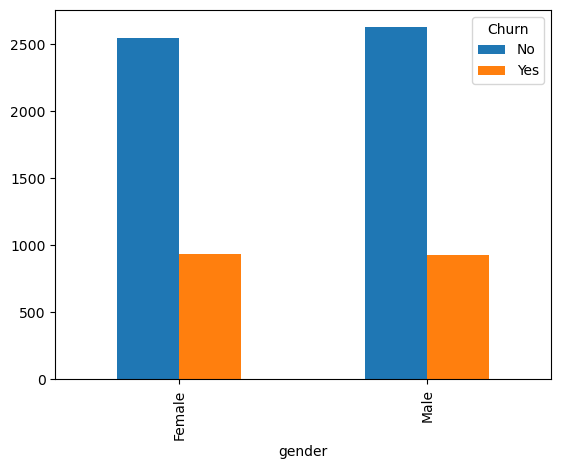

In [10]:
pd.crosstab(df.gender,df.Churn).plot(kind="bar")
plt.show()

## EDA
* doing some eda first to get more clarity

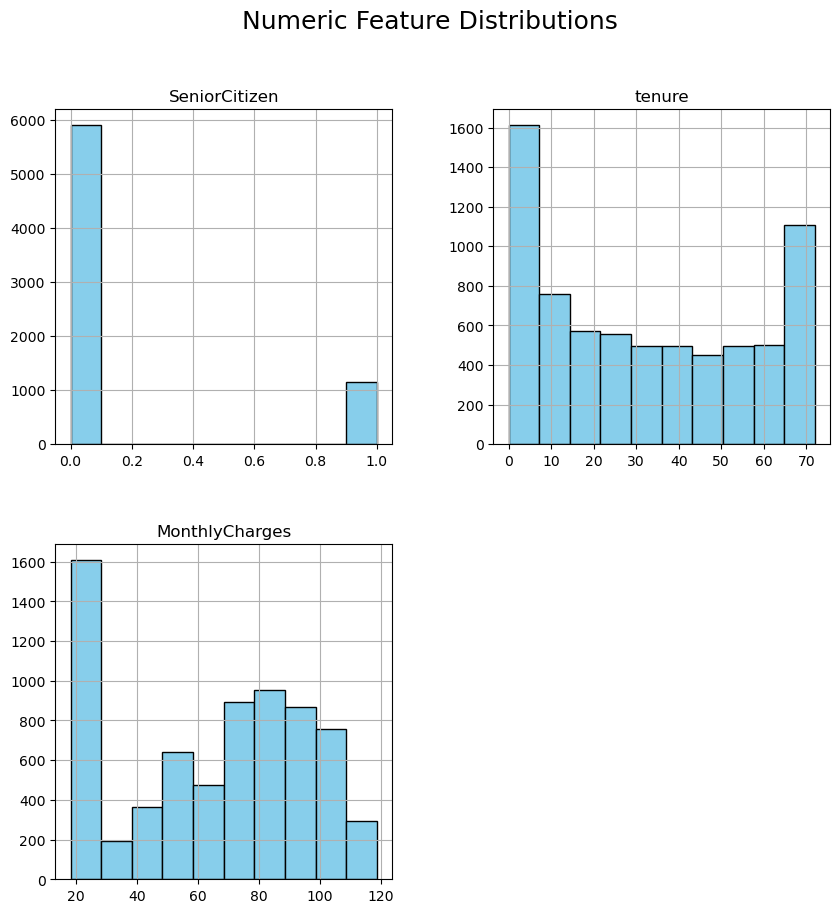

In [11]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].hist(figsize=(10,10), color="skyblue", edgecolor="black")
plt.suptitle("Numeric Feature Distributions", size=18)
plt.show()

* people with longer tenure tend to stay
* ppl with less monthly charge tend to stay

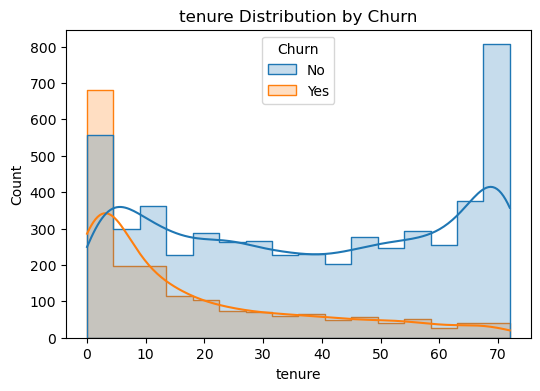

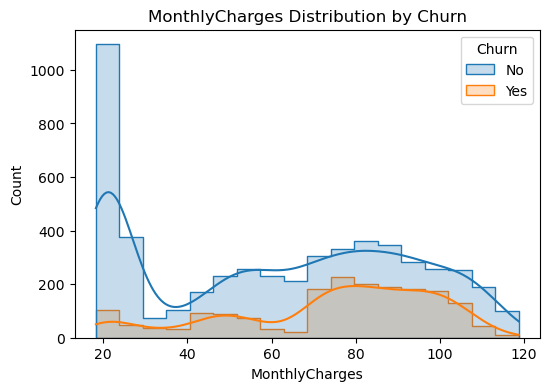

In [12]:
num_cols = ["tenure", "MonthlyCharges"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Churn", kde=True ,element="step") #kde=kernel density estimation
    plt.title(f"{col} Distribution by Churn")
    plt.show()

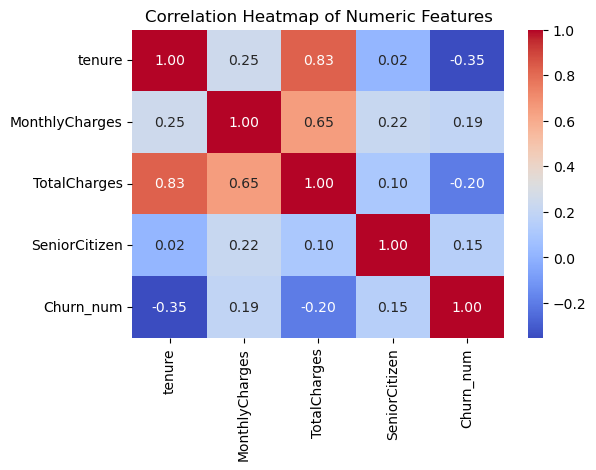

In [13]:
df_corr = df.copy()
df_corr["Churn_num"] = df_corr["Churn"].map({"No": 0, "Yes": 1})
df_corr["TotalCharges"] = pd.to_numeric(df_corr["TotalCharges"], errors="coerce")
num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen", "Churn_num"]
corr = df_corr[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

* tenure vs churn (-0.35 correlation) : longer the tenure less likely to churn


## Just to get an idea of churn patterns in cat variables, who influences the most

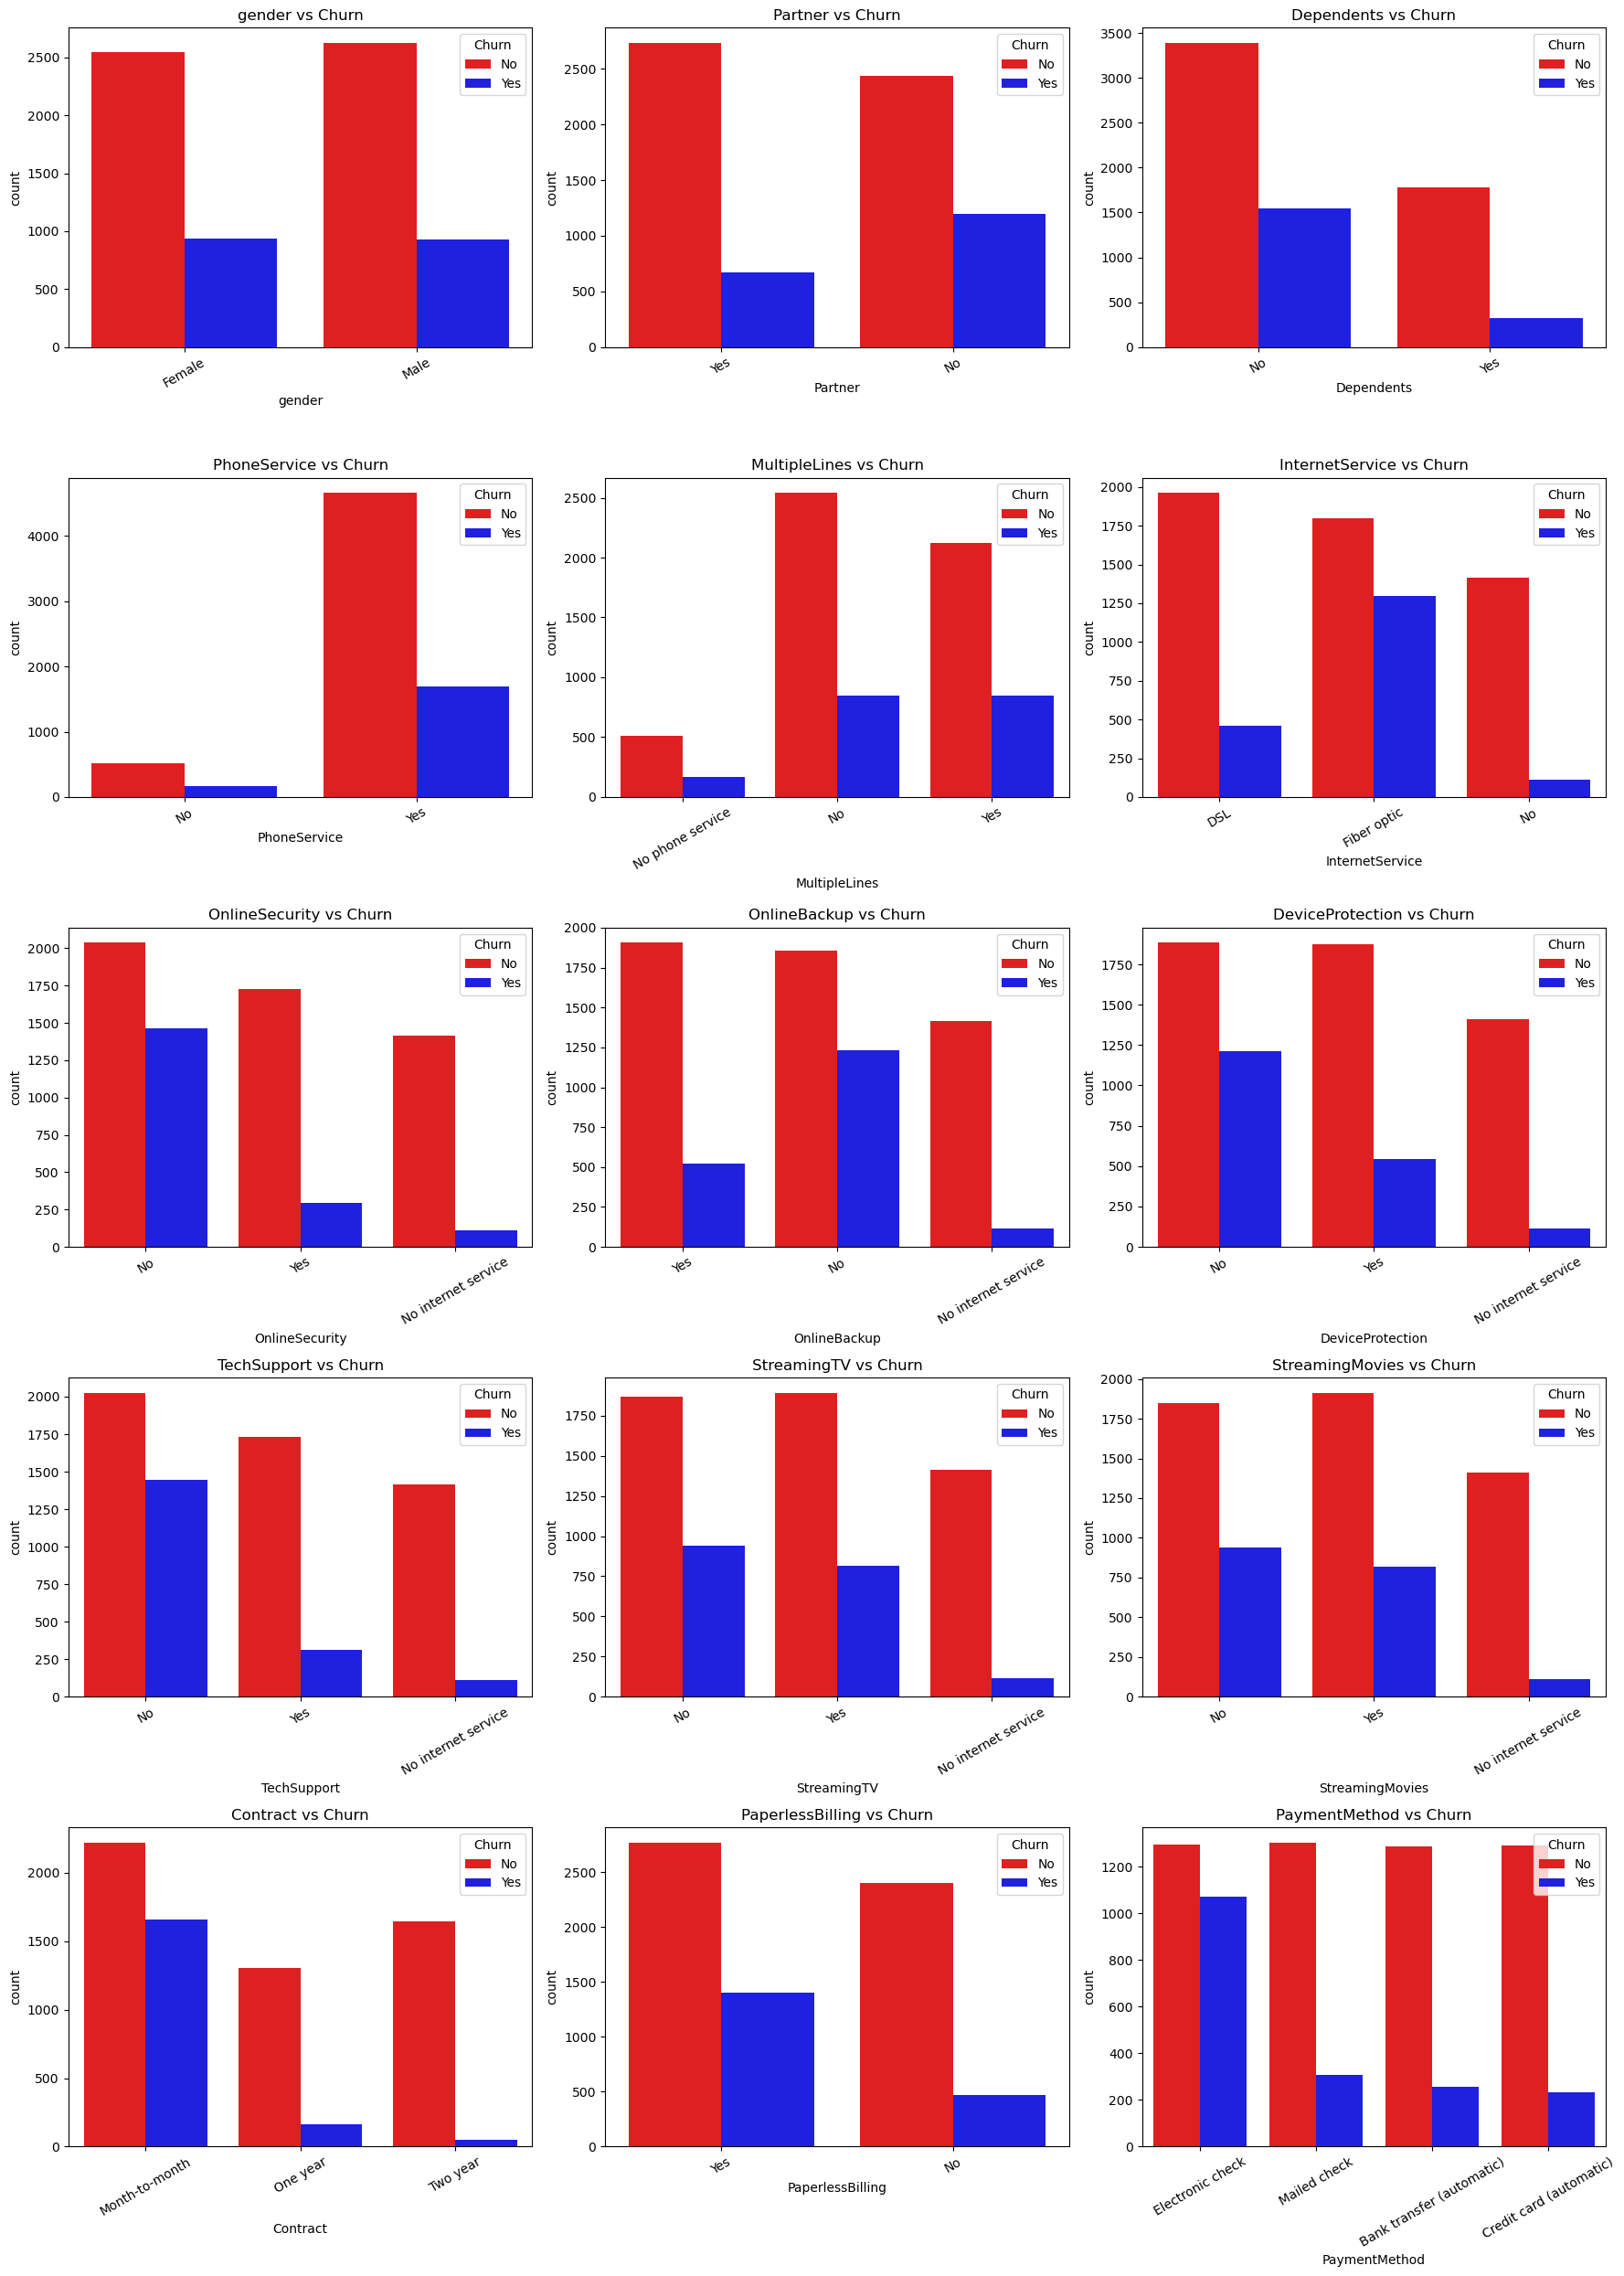

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c not in ["customerID", "Churn", "TotalCharges"]]
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue="Churn", ax=axes[i],palette={"No": "red", "Yes": "blue"})
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis="x", rotation=30)
plt.tight_layout()
plt.show()

## Feature engineering
From the above graphs we can observe few patterns, which i would like to flag
* Online Security, Online backup, Device protection , tech suppport = No, "No service"=1
* Contract = month-to-month, Payment methond = electronic check

In [18]:
df["No_service"]= ( 
    (df["OnlineSecurity"]=="No")& 
    (df["OnlineBackup"]=="No")&
    (df["DeviceProtection"]=="No")&
    (df["TechSupport"]=="No")).astype(int)
df["HighRisk"]=(
    (df["Contract"]=="Month-to-month")&
    (df["PaymentMethod"]=="Electronic check")).astype(int)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,No_service,HighRisk
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,1


In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
No_service          0
HighRisk            0
dtype: int64

In [21]:
df = df.drop('customerID',axis=1)

In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'No_service', 'HighRisk'],
      dtype='object')

In [23]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
No_service            int64
HighRisk              int64
dtype: object

In [24]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [25]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
No_service          0
HighRisk            0
dtype: int64

In [26]:
X= df.drop('Churn',axis=1)
y=df['Churn']
y = y.map({"No": 0, "Yes": 1})


In [27]:
cat_cols = X.select_dtypes(include="object").columns
for col in cat_cols:
    X[col] = X[col].astype("category")

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score


In [29]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [38]:
!pip install category_encoders

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------------ --------------------------- 2.9/9.6 MB 14.7 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 14.8 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [patsy]
   ---------------------------------------- 0/3 [patsy]
   ---------------------------------------- 0/3 [patsy]
   ---------------------------------------- 0/3 [patsy]
   ---------------------------------------- 0/3 [patsy]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3 [statsmodels]
   ------------- -------------------------- 1/3

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [31]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder

## Trying out different variations

## Variation 1
* median, standardscaler, most freq, onehotencoder 

In [32]:
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include="category").columns
num_transformer = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler()) ])
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("enocder",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])
preprocessor = ColumnTransformer([
    ("num",num_transformer,num_features),
    ("cat",cat_transformer,cat_features) ])

models = {
    "Logistic" : LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
    }
results=[]
pipes={}
for name,model in models.items():
    pipe = ImbPipeline([
        ("precprocessor",preprocessor),
        ("smote",SMOTE(random_state=42)),
        ("clf",model)])
    pipe.fit(X_train,y_train)
    y_pred= pipe.predict(X_test)
    y_proba=pipe.predict_proba(X_test)[:,1]
    
    results.append({
        "model":name,
        "accuracy": accuracy_score(y_test,y_pred),
        "precision": precision_score(y_test,y_pred,zero_division=0),
        "recall":recall_score(y_test,y_pred,zero_division=0),
        "f1": f1_score(y_test,y_pred,zero_division=0),
        "roc_auc": roc_auc_score(y_test,y_proba) })
results_df1 = pd.DataFrame(results)
print(results_df1)


C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, 

          model  accuracy  precision    recall        f1   roc_auc
0      Logistic  0.733854   0.499151  0.786096  0.610592  0.841138
1  RandomForest  0.768630   0.569364  0.526738  0.547222  0.814060
2       XGBoost  0.775018   0.576000  0.577540  0.576769  0.815090
3           LDA  0.738112   0.504363  0.772727  0.610348  0.835351
4           QDA  0.740241   0.523810  0.235294  0.324723  0.722593


C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


## Variation 2
* median, robustscaler, most freq, onehot


In [33]:
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include="category").columns
num_transformer = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",RobustScaler()) ])
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("enocder",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])
preprocessor = ColumnTransformer([
    ("num",num_transformer,num_features),
    ("cat",cat_transformer,cat_features) ])

models = {
    "Logistic" : LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
    }
results=[]
pipes={}
for name,model in models.items():
    pipe = ImbPipeline([
        ("precprocessor",preprocessor),
        ("smote",SMOTE(random_state=42)),
        ("clf",model)])
    pipe.fit(X_train,y_train)
    y_pred= pipe.predict(X_test)    
    y_proba=pipe.predict_proba(X_test)[:,1]
    results.append({
        "model":name,
        "accuracy": accuracy_score(y_test,y_pred),
        "precision": precision_score(y_test,y_pred,zero_division=0),
        "recall":recall_score(y_test,y_pred,zero_division=0),
        "f1": f1_score(y_test,y_pred,zero_division=0),
        "roc_auc": roc_auc_score(y_test,y_proba)})
results_df2 = pd.DataFrame(results)
print(results_df2)

          model  accuracy  precision    recall        f1   roc_auc
0      Logistic  0.744500   0.512195  0.786096  0.620253  0.840897
1  RandomForest  0.776437   0.579946  0.572193  0.576043  0.813652
2       XGBoost  0.777857   0.580052  0.590909  0.585430  0.817894
3           LDA  0.740951   0.507937  0.770053  0.612115  0.835470
4           QDA  0.640880   0.392157  0.641711  0.486815  0.686366


C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


## Variation 3
* median, no scaler, most_freq, ordinalencoder

In [34]:
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include="category").columns
num_transformer = Pipeline([
    ("imputer",SimpleImputer(strategy="median"))])
#    ("scaler",RobustScaler()) ])
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("enocder",OrdinalEncoder())])
preprocessor = ColumnTransformer([
    ("num",num_transformer,num_features),
    ("cat",cat_transformer,cat_features) ])

models = {
    "Logistic" : LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
    }
results=[]
pipes={}
for name,model in models.items():
    pipe = ImbPipeline([
        ("precprocessor",preprocessor),
        ("smote",SMOTE(random_state=42)),
        ("clf",model)])
    pipe.fit(X_train,y_train)
    y_pred= pipe.predict(X_test)
    y_proba=pipe.predict_proba(X_test)[:,1]
    results.append({
        "model":name,
        "accuracy": accuracy_score(y_test,y_pred),
        "precision": precision_score(y_test,y_pred,zero_division=0),
        "recall":recall_score(y_test,y_pred,zero_division=0),
        "f1": f1_score(y_test,y_pred,zero_division=0),
        "roc_auc": roc_auc_score(y_test,y_proba) })
results_df3 = pd.DataFrame(results)
print(results_df3)

C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


          model  accuracy  precision    recall        f1   roc_auc
0      Logistic  0.745919   0.513793  0.796791  0.624738  0.837214
1  RandomForest  0.783534   0.606811  0.524064  0.562410  0.819068
2       XGBoost  0.777147   0.590361  0.524064  0.555241  0.813917
3           LDA  0.741661   0.508961  0.759358  0.609442  0.835235
4           QDA  0.750177   0.520677  0.740642  0.611479  0.832189


## Variation 4
* mean, minmaxscaler, constant,ordinalencoder

In [35]:
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include="category").columns
num_transformer = Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler",MinMaxScaler()) ])
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy = "constant")),
    ("enocder",OrdinalEncoder())])
preprocessor = ColumnTransformer([
    ("num",num_transformer,num_features),
    ("cat",cat_transformer,cat_features) ])

models = {
    "Logistic" : LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
    }
results=[]
pipes={}
for name,model in models.items():
    pipe = ImbPipeline([
        ("precprocessor",preprocessor),
        ("smote",SMOTE(random_state=42)),
        ("clf",model)])
    pipe.fit(X_train,y_train)
    y_pred= pipe.predict(X_test)
    y_proba=pipe.predict_proba(X_test)[:,1]
    results.append({
        "model":name,
        "accuracy": accuracy_score(y_test,y_pred),
        "precision": precision_score(y_test,y_pred,zero_division=0),
        "recall":recall_score(y_test,y_pred,zero_division=0),
        "f1": f1_score(y_test,y_pred,zero_division=0),
        "roc_auc": roc_auc_score(y_test,y_proba)  })
results_df4 = pd.DataFrame(results)
print(results_df4)

          model  accuracy  precision    recall        f1   roc_auc
0      Logistic  0.743080   0.510638  0.770053  0.614072  0.839226
1  RandomForest  0.784244   0.593583  0.593583  0.593583  0.818368
2       XGBoost  0.782825   0.589474  0.598930  0.594164  0.817913
3           LDA  0.742370   0.509910  0.756684  0.609257  0.835819
4           QDA  0.744500   0.512590  0.762032  0.612903  0.832747


## Variation 5
* median, standard scaler, mostfreq, targetencoder

In [36]:
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include="category").columns
num_transformer = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",MinMaxScaler()) ])
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("enocder",TargetEncoder())])
preprocessor = ColumnTransformer([
    ("num",num_transformer,num_features),
    ("cat",cat_transformer,cat_features) ])

models = {
    "Logistic" : LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
    }
results=[]
pipes={}
for name,model in models.items():
    pipe = ImbPipeline([
        ("precprocessor",preprocessor),
        ("smote",SMOTE(random_state=42)),
        ("clf",model)])
    pipe.fit(X_train,y_train)
    y_pred= pipe.predict(X_test)
    y_proba=pipe.predict_proba(X_test)[:,1]
    results.append({
        "model":name,
        "accuracy": accuracy_score(y_test,y_pred),
        "precision": precision_score(y_test,y_pred,zero_division=0),
        "recall":recall_score(y_test,y_pred,zero_division=0),
        "f1": f1_score(y_test,y_pred,zero_division=0),
        "roc_auc": roc_auc_score(y_test,y_proba) })
results_df5 = pd.DataFrame(results)
print(results_df5)

          model  accuracy  precision    recall        f1   roc_auc
0      Logistic  0.738112   0.504318  0.780749  0.612802  0.838172
1  RandomForest  0.782115   0.597668  0.548128  0.571827  0.824218
2       XGBoost  0.776437   0.582173  0.558824  0.570259  0.819919
3           LDA  0.737402   0.503497  0.770053  0.608879  0.836327
4           QDA  0.744500   0.512635  0.759358  0.612069  0.831460


C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


## Variation 6
* mean, min-max, mostfreq, target

In [37]:
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include="category").columns
num_transformer = Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler",MinMaxScaler()) ])
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("enocder",TargetEncoder())])
preprocessor = ColumnTransformer([
    ("num",num_transformer,num_features),
    ("cat",cat_transformer,cat_features) ])

models = {
    "Logistic" : LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
    }
results=[]
pipes={}
for name,model in models.items():
    pipe = ImbPipeline([
        ("precprocessor",preprocessor),
        ("smote",SMOTE(random_state=42)),
        ("clf",model)])
    pipe.fit(X_train,y_train)
    y_pred= pipe.predict(X_test)
    y_proba=pipe.predict_proba(X_test)[:,1]
    
    results.append({
        "model":name,
        "accuracy": accuracy_score(y_test,y_pred),
        "precision": precision_score(y_test,y_pred,zero_division=0),
        "recall":recall_score(y_test,y_pred,zero_division=0),
        "f1": f1_score(y_test,y_pred,zero_division=0),
        "roc_auc": roc_auc_score(y_test,y_proba)  })
results_df6 = pd.DataFrame(results)
print(results_df6)

          model  accuracy  precision    recall        f1   roc_auc
0      Logistic  0.738112   0.504318  0.780749  0.612802  0.838172
1  RandomForest  0.774308   0.582353  0.529412  0.554622  0.818736
2       XGBoost  0.776437   0.582173  0.558824  0.570259  0.819919
3           LDA  0.737402   0.503497  0.770053  0.608879  0.836327
4           QDA  0.744500   0.512635  0.759358  0.612069  0.831460


C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


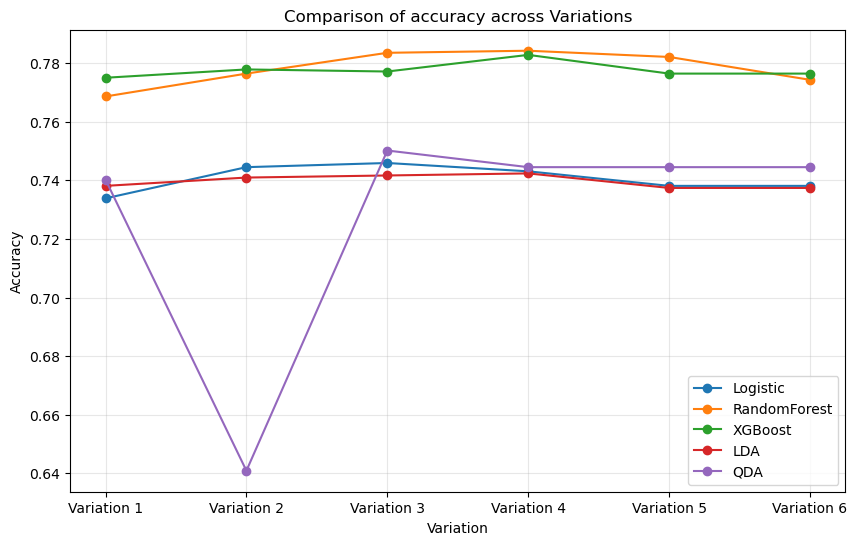

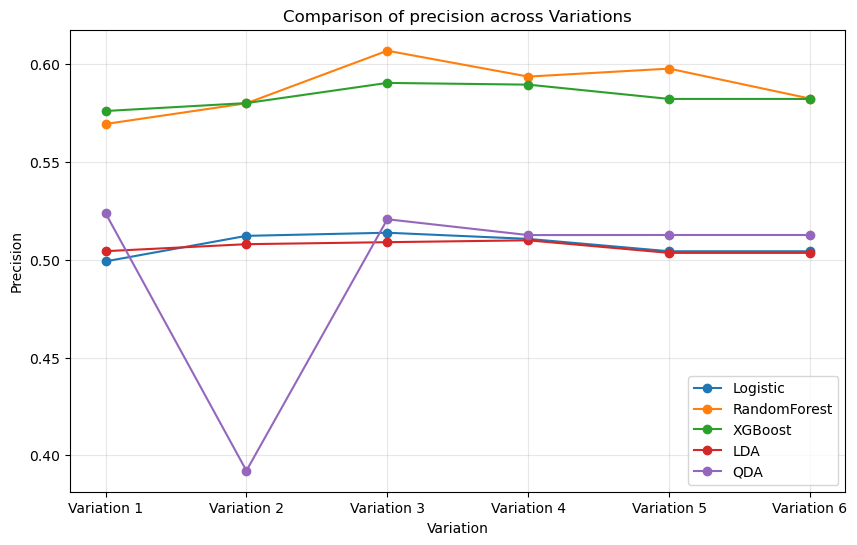

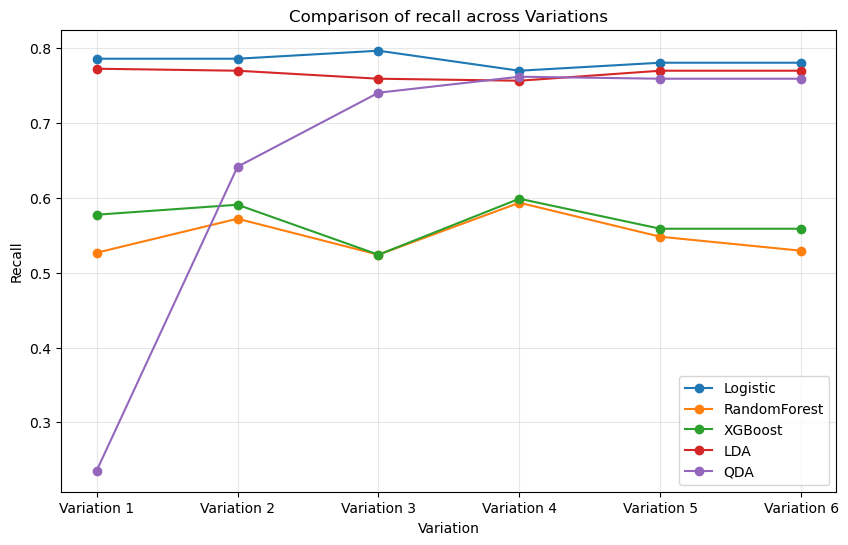

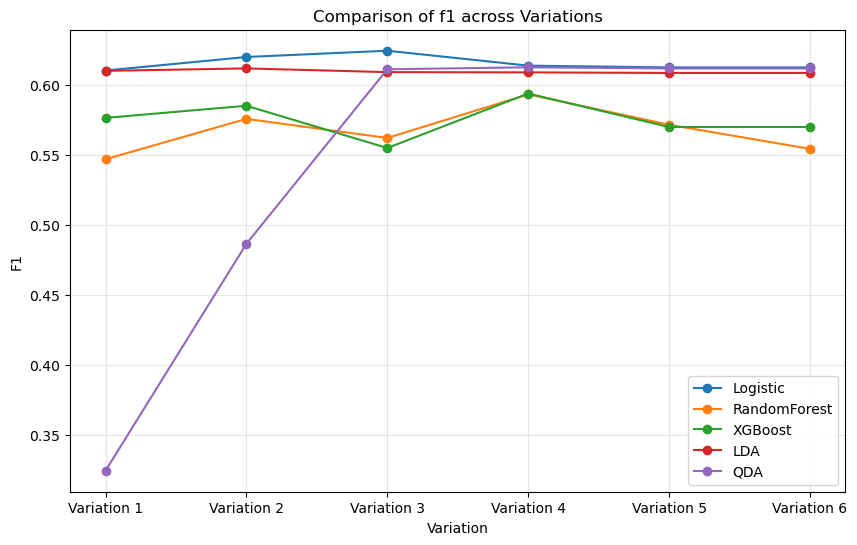

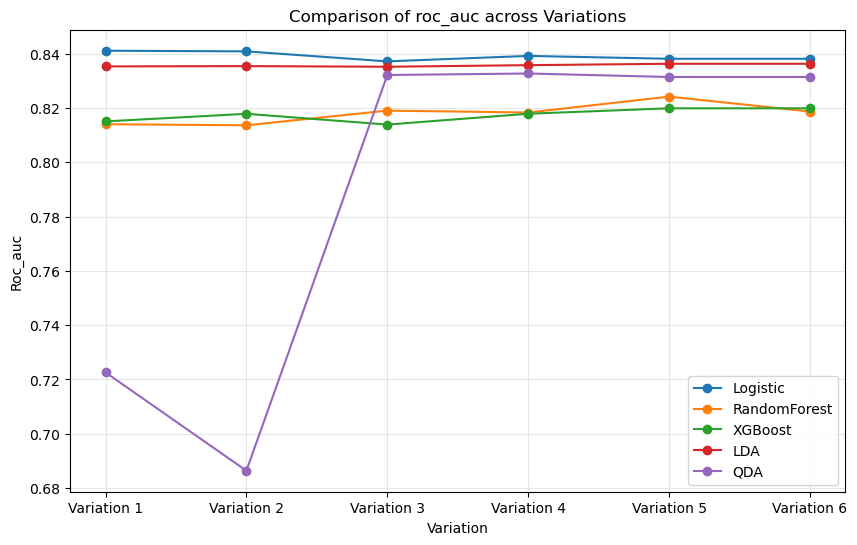

In [38]:
d1 = results_df1.copy(); d1["variation"] = "Variation 1"
d2 = results_df2.copy(); d2["variation"] = "Variation 2"
d3 = results_df3.copy(); d3["variation"] = "Variation 3"
d4 = results_df4.copy(); d4["variation"] = "Variation 4"
d5 = results_df5.copy(); d5["variation"] = "Variation 5"
d6 = results_df6.copy(); d6["variation"] = "Variation 6"

comparison_df = pd.concat([d1,d2,d3,d4,d5,d6], ignore_index=True)

metrics = ["accuracy","precision","recall","f1","roc_auc"]

for metric in metrics:
    plt.figure(figsize=(10,6))
    for model in comparison_df["model"].unique():
        subset = comparison_df[comparison_df["model"] == model]
        plt.plot(subset["variation"], subset[metric], marker="o", label=model)
    plt.title(f"Comparison of {metric} across Variations")
    plt.ylabel(metric.capitalize())
    plt.xlabel("Variation")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

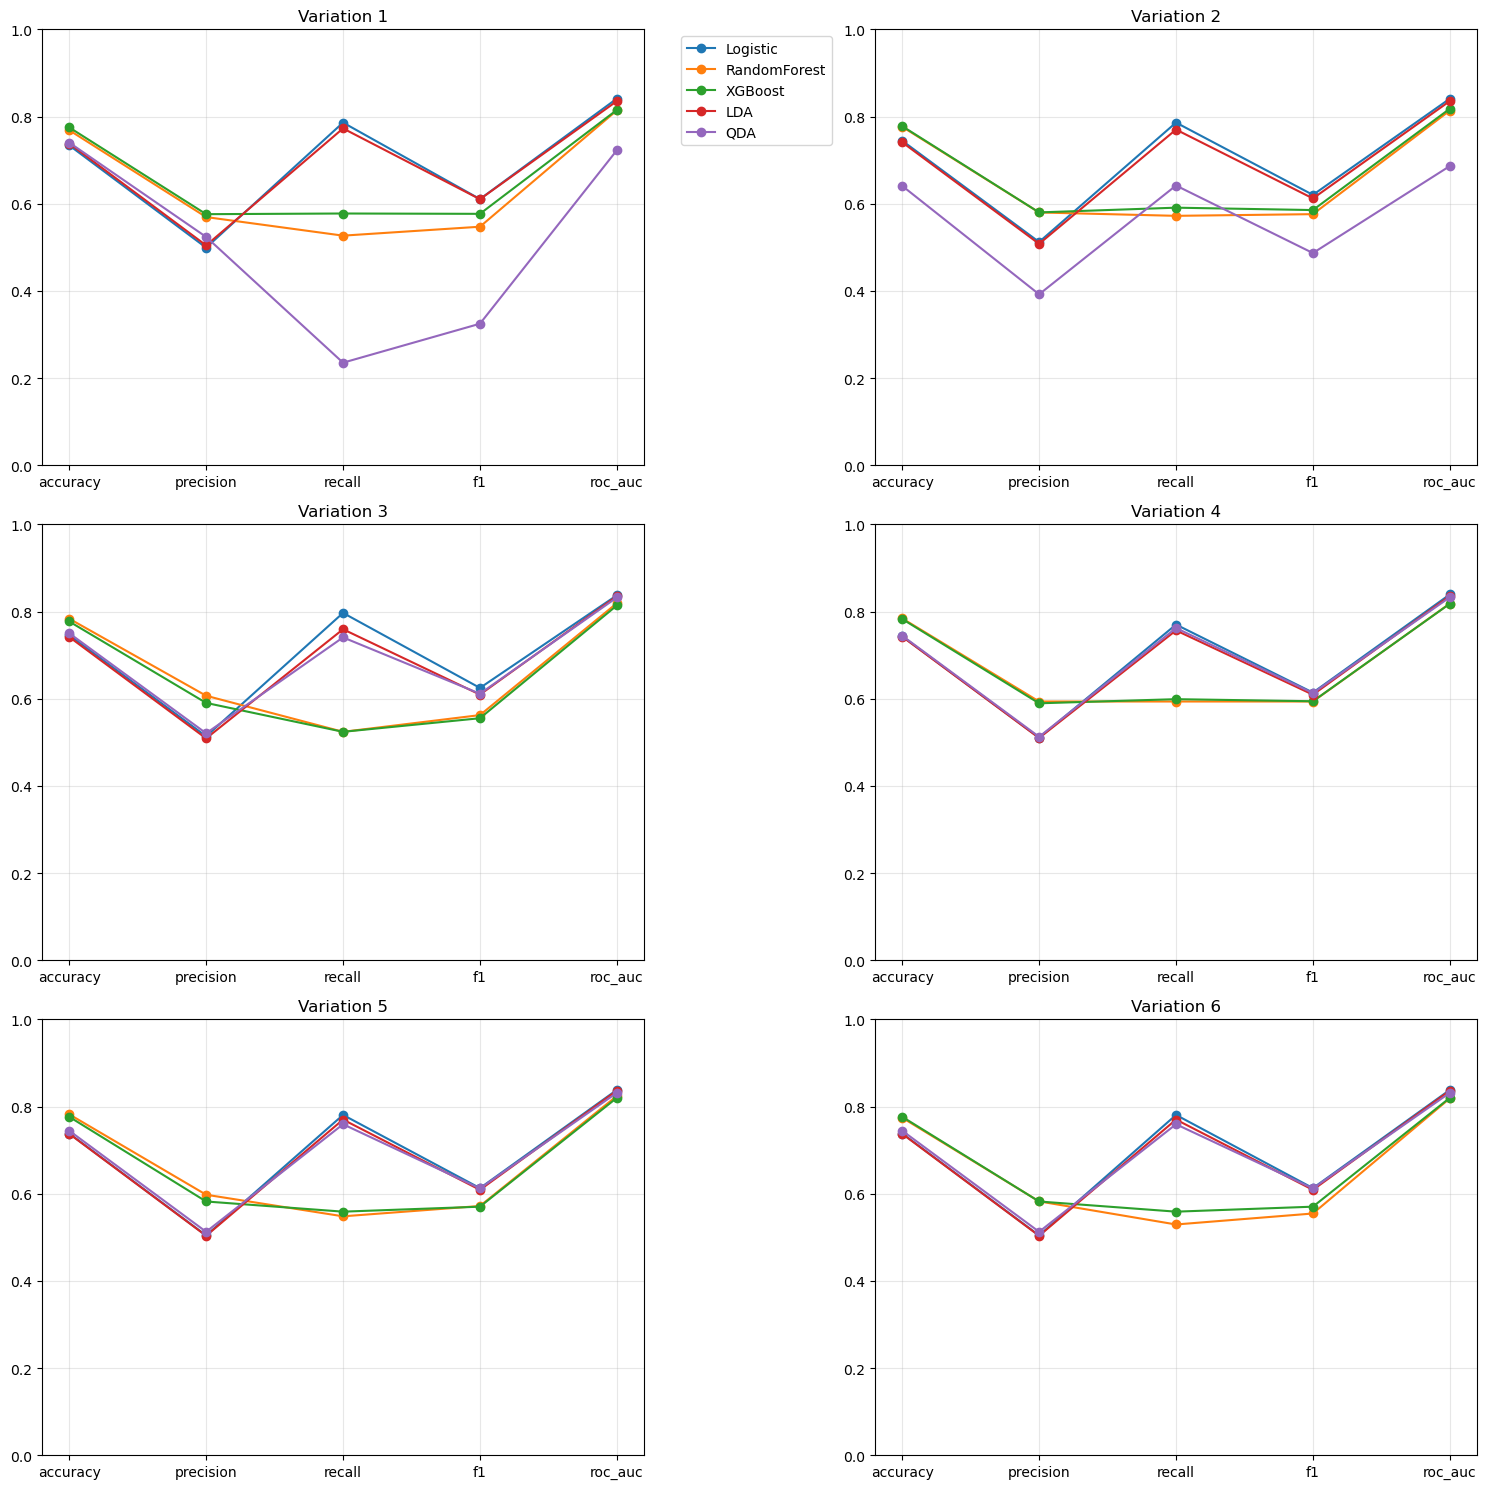

In [39]:
dfs = [results_df1, results_df2, results_df3, results_df4, results_df5, results_df6]
names = [f"Variation {i}" for i in range(1,7)]
metrics = ["accuracy","precision","recall","f1","roc_auc"]

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, df in enumerate(dfs):
    ax = axes[i]
    for model in df["model"]:
        values = df.loc[df["model"] == model, metrics].values.flatten()
        ax.plot(metrics, values, marker="o", label=model)
    ax.set_title(names[i])
    ax.set_ylim(0, 1)
    ax.grid(alpha=0.3)

# Legend only once
axes[0].legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [40]:
comparison_df[comparison_df["model"].isin(["Logistic","RandomForest","XGBoost"])]

,model,accuracy,precision,recall,f1,roc_auc,variation
0,Logistic,0.733854,0.499151,0.786096,0.610592,0.841138,Variation 1
1,RandomForest,0.768630,0.569364,0.526738,0.547222,0.814060,Variation 1
2,XGBoost,0.775018,0.576000,0.577540,0.576769,0.815090,Variation 1
5,Logistic,0.744500,0.512195,0.786096,0.620253,0.840897,Variation 2
6,RandomForest,0.776437,0.579946,0.572193,0.576043,0.813652,Variation 2
7,XGBoost,0.777857,0.580052,0.590909,0.585430,0.817894,Variation 2
10,Logistic,0.745919,0.513793,0.796791,0.624738,0.837214,Variation 3
11,RandomForest,0.783534,0.606811,0.524064,0.562410,0.819068,Variation 3
12,XGBoost,0.777147,0.590361,0.524064,0.555241,0.813917,Variation 3
15,Logistic,0.743080,0.510638,0.770053,0.614072,0.839226,Variation 4


## We are going to hypertune:
* Logistic Regression variation3
* Random Forest variation 5
* XGBoost variation variation 4

In [41]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

## Logistic

In [42]:
%%time
np.random.seed(42)
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include="category").columns
num_transformer_1 = Pipeline([
    ("imputer",SimpleImputer(strategy="median"))])
#    ("scaler",RobustScaler()) ])
cat_transformer_1 = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("enocder",OrdinalEncoder())])
preprocessor1 = ColumnTransformer([
    ("num",num_transformer_1,num_features),
    ("cat",cat_transformer_1,cat_features) ])
def make_pipeline_for(estimator):
    return ImbPipeline([
        ("precprocessor",preprocessor1),
        ("smote",SMOTE(random_state=42)),
        ("clf",estimator)])
log_model = LogisticRegression(solver="liblinear", max_iter=500, class_weight="balanced")
log_grid = {
    "clf__C": np.logspace(-4, 4, 20),          
    "clf__penalty": ["l1", "l2", "elasticnet", "none"], 
    "clf__l1_ratio": np.linspace(0, 1, 5)      
}
log_reg_pipe= make_pipeline_for(log_model)
log_search = RandomizedSearchCV(
    log_reg_pipe,
    log_grid,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)
log_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\sktmb\Desktop\sample_project_1\env\Lib\sit

CPU times: total: 5.52 s
Wall time: 41.5 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('precprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'No_service', 'HighRisk'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'clf__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                                        'clf__penalty': ['l1', 'l2',
                                                         'elasticnet',
                                                         'none']},
                   random_state=42, verbose=2)

In [43]:
log_search.best_params_

{'clf__penalty': 'l2',
 'clf__l1_ratio': np.float64(0.75),
 'clf__C': np.float64(0.004832930238571752)}

In [44]:
best_pipeline1 = log_search.best_estimator_
best_pipeline1.fit(X_train, y_train)

C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Pipeline(steps=[('precprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'No_service', 'HighRisk'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enocder',
                                                                   OrdinalEncoder())]),
                                                  Ind...
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(C=np.float64(0.004832930238571752),
                                    class_weight='balanced',
                                    l1_ratio=np.float64(0.75), max_iter=500,
                                    solver='liblinear'))])

In [68]:
evaluate_model(best_pipeline1,X_test,y_test)

Accuracy: 0.7452093683463449
Precision: 0.5128205128205128
Recall: 0.8021390374331551
F1 Score: 0.6256517205422315
ROC-AUC: 0.8396161099485908


In [69]:
results_log_b4 = results_df3[results_df3["model"] == "Logistic"]
results_log = pd.DataFrame([["Logistic",0.7452093683463449,0.5128205128205128,0.8021390374331551,0.6256517205422315,0.8396161099485908]], columns=["model","accuracy","precision","recall","f1","roc_auc"])
pd.concat([results_log_b4,results_log],ignore_index=True)

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic,0.745919,0.513793,0.796791,0.624738,0.837214
1,Logistic,0.745209,0.512821,0.802139,0.625652,0.839616


## After hypertuning Logistic
**Recall**,**f1**,**roc_auc** values go up while **accuracy** and **precision** go down slightly

## RandomForest

In [54]:
%%time
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include="category").columns
num_transformer2 = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",MinMaxScaler()) ])
cat_transformer2 = Pipeline([
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("enocder",TargetEncoder())])
preprocessor2 = ColumnTransformer([
    ("num",num_transformer2,num_features),
    ("cat",cat_transformer2,cat_features) ])
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight=None)
rf_grid = {
    "clf__n_estimators": range(100,400,50),
    "clf__max_depth":[None]+list(range(4,21,2)),
    "clf__min_samples_split": [2,4,6,8,10],
    "clf__min_samples_leaf": range(1,6),
    "clf__max_features":["sqrt","log2",0.2,0.5,0.8],
    "clf__bootstrap":[True,False]}
def make_pipeline_for(estimator):
    return ImbPipeline([
        ("precprocessor",preprocessor2),
        ("smote",SMOTE(random_state=42)),
        ("clf",estimator)])
rf_pipe= make_pipeline_for(rf_model)
rf_search = RandomizedSearchCV(
    rf_pipe,
    param_distributions=rf_grid,
    n_iter=50,          
    cv=5,   
    n_jobs=-1,
    verbose=2,
    random_state=42,
    return_train_score=False
)
rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 8.62 s
Wall time: 6min 6s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('precprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'No_service', 'HighRisk'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(s...
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'clf__bootstrap': [True, False],
                                        'clf__max_depth': [None, 4, 6, 8, 10,
                                                           12, 14, 16, 18, 20],
                                        'clf__max_features': ['sqrt', 'log2',
                                                              0.2, 0.5, 0.8],
                                        'clf__min_samples_leaf': range(1, 6),
                                        'clf__min_samples_split': [2, 4, 6, 8,
                                                                   10],
                                        'clf__n_estimators': range(100, 400, 50)},
                   random_state=42, verbose=2)

In [70]:
best_pipeline2 = rf_search.best_estimator_
best_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('precprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'No_service', 'HighRisk'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enocde...
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(max_depth=14, max_features='log2',
                                        min_samples_split=4, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [71]:
evaluate_model(rf_search,X_test,y_test)

Accuracy: 0.7785663591199432
Precision: 0.5794871794871795
Recall: 0.6042780748663101
F1 Score: 0.5916230366492147
ROC-AUC: 0.8326151540985302


In [65]:
results_rf_b4 = results_df5[results_df5["model"] == "RandomForest"]
results_rf = pd.DataFrame([["RandomForest",0.7785663591199432,0.5794871794871795,0.6042780748663101,0.5916230366492147,0.8326151540985302]], columns=["model","accuracy","precision","recall","f1","roc_auc"])
pd.concat([results_rf_b4,results_rf],ignore_index=True)

,model,accuracy,precision,recall,f1,roc_auc
0,RandomForest,0.782115,0.597668,0.548128,0.571827,0.824218
1,RandomForest,0.778566,0.579487,0.604278,0.591623,0.832615


## After tuning RandomForest
**accuracy**, **precision** values drop by 1-2% while **recall**,**f1**,**roc_auc** value increase

## XGBoost

In [61]:
%%time
num_features = X.select_dtypes(include=["int64","float64"]).columns
cat_features = X.select_dtypes(include="category").columns
num_transformer3 = Pipeline([
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler",MinMaxScaler()) ])
cat_transformer3 = Pipeline([
    ("imputer", SimpleImputer(strategy = "constant")),
    ("enocder",OrdinalEncoder())])
preprocessor3 = ColumnTransformer([
    ("num",num_transformer3,num_features),
    ("cat",cat_transformer3,cat_features) ])
xgb_model = XGBClassifier(objective="binary:logistic",eval_metric="logloss",use_label_encoder=False,random_state=42,enable_categorical=True )
xgb_grid = {
    "clf__n_estimators":range(100,500,50),
    "clf__max_depth": range(3,10,1),
    "clf__learning_rate":np.linspace(0.01,0.3,10),
    "clf__subsample":np.linspace(0.6,1.0,6),
    "clf__colsample_bytree":np.linspace(0.5,1.0,6)}
def make_pipeline_for(estimator):
    return ImbPipeline([
        ("precprocessor",preprocessor3),
        ("smote",SMOTE(random_state=42)),
        ("clf",estimator)])
xgb_pipe = make_pipeline_for(xgb_model)
xgb_search = RandomizedSearchCV(xgb_pipe,
    param_distributions=xgb_grid,
    cv=5,
    n_iter=100,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:08:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CPU times: total: 8.27 s
Wall time: 4min 22s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('precprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'No_service', 'HighRisk'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='constant...
                   param_distributions={'clf__colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'clf__learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'clf__max_depth': range(3, 10),
                                        'clf__n_estimators': range(100, 500, 50),
                                        'clf__subsample': array([0.6 , 0.68, 0.76, 0.84, 0.92, 1.  ])},
                   random_state=42, verbose=2)

In [72]:
best_pipeline3 = xgb_search.best_estimator_
best_pipeline3.fit(X_train, y_train)

C:\Users\sktmb\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:21:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('precprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'No_service', 'HighRisk'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('enocder',
                                                                   OrdinalEncoder())])...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=np.float64(0.10666666666666666),
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [73]:
evaluate_model(xgb_search,X_test,y_test)

Accuracy: 0.7828246983676366
Precision: 0.583743842364532
Recall: 0.6336898395721925
F1 Score: 0.6076923076923076
ROC-AUC: 0.8416505205507763


In [64]:
results_xgb_b4 = results_df4[results_df5["model"] == "XGBoost"]
results_xgb = pd.DataFrame([["XGBoost",0.7828246983676366,0.583743842364532,0.6336898395721925,0.6076923076923076,0.8416505205507763]], columns=["model","accuracy","precision","recall","f1","roc_auc"])
pd.concat([results_xgb_b4,results_xgb],ignore_index=True)

,model,accuracy,precision,recall,f1,roc_auc
0,XGBoost,0.782825,0.589474,0.59893,0.594164,0.817913
1,XGBoost,0.782825,0.583744,0.63369,0.607692,0.841651


In [76]:
pd.concat([results_log,results_rf,results_xgb],ignore_index=True).T

,0,1,2
model,Logistic,RandomForest,XGBoost
accuracy,0.745209,0.778566,0.782825
precision,0.512821,0.579487,0.583744
recall,0.802139,0.604278,0.63369
f1,0.625652,0.591623,0.607692
roc_auc,0.839616,0.832615,0.841651


## Feature Importances

In [78]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

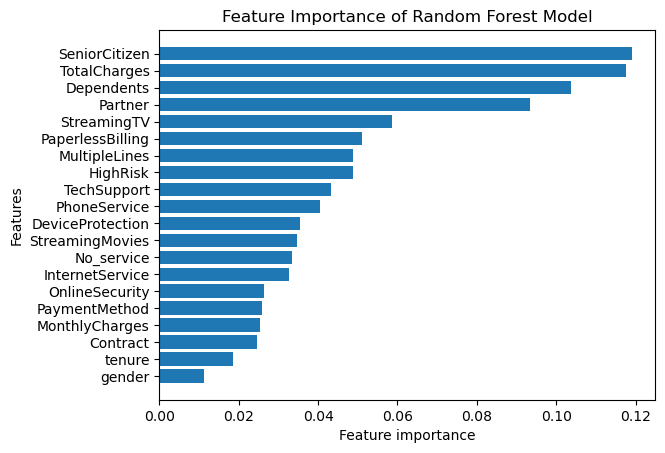

In [94]:
clf_model2 = best_pipeline2.named_steps["clf"]
plot_features(X_train.columns,clf_model2.feature_importances_)
plt.title("Feature Importance of Random Forest Model")
plt.show()

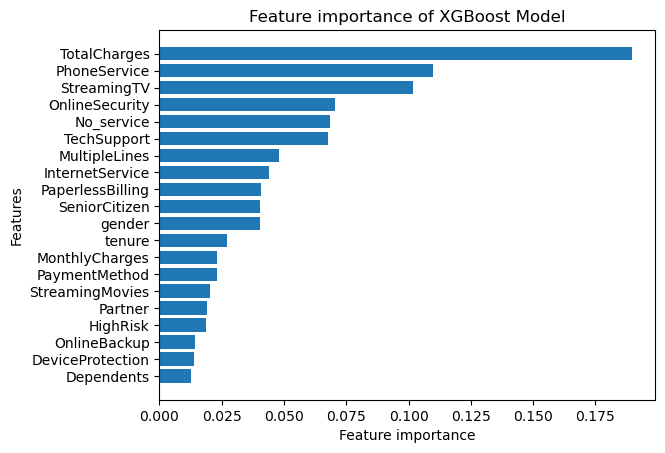

In [95]:
clf_model3 = best_pipeline3.named_steps["clf"]
plot_features(X_train.columns,clf_model3.feature_importances_)
plt.title("Feature importance of XGBoost Model")
plt.show()